# Train Test Split

In [4715]:
import pandas as pd
from pathlib import Path
DATA_PATH = Path('../data')

In [4716]:
weeks = 30
df = pd.read_csv(DATA_PATH/f'train_data_{weeks}_weeks.csv', index_col=0)

In [4717]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# correlation_matrix = df.corr()
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [4718]:
y = df.pop('target')
X = df.copy()

In [4719]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [4720]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


# Standarization

In [4721]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [4722]:
print(X_train)

     is_premium  weeks_after_artist_created  weeks_after_song_released  \
0           0.0                    1.411376                   2.095606   
1           0.0                    0.561281                  -0.695553   
2           0.0                   -0.926386                  -0.695553   
3           0.0                    0.773805                  -0.230360   
4           0.0                    0.773805                   0.467430   
..          ...                         ...                        ...   
307         0.0                    0.136233                   0.467430   
308         0.0                    0.773805                   1.165220   
309         0.0                   -0.713862                   0.002237   
310         0.0                   -0.076291                  -0.462957   
311         0.0                    0.136233                   0.234833   

     unique_listeners  total_streams  perc_of_subscribed_listeners  \
0            0.808694      -0.168060     

# Training and Testing ML

In [4723]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb

#model = LinearRegression()
#model = Ridge(alpha=1.0)
model = xgb.XGBRegressor(objective='reg:squarederror', alpha = 0, colsample_bytree = 1, 
                             learning_rate = 0.01, max_depth = 3, n_estimators = 300, reg_lambda = 1, subsample = 0.8)

#model = DecisionTreeClassifier()
#model = svm.SVC(kernel='linear')

In [4724]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1],
#     'alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# best_model = xgb.XGBRegressor(**best_params)

In [4725]:
model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [4726]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#y_train_pred_log = model.predict(X_train)
y_train_pred = model.predict(X_train)
# Make predictions on the test set
#y_test_pred_log = model.predict(X_test)
y_test_pred = model.predict(X_test)

#new
# y_train_pred = np.expm1(y_train_pred_log)
# y_test_pred = np.expm1(y_test_pred_log)
# y_train = np.expm1(y_train)
# y_test = np.expm1(y_test)

# Calculate Root Mean Squared Error (RMSE) on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared (R2) on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE on train set: {rmse_train:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")

print(f"R-squared on train set: {r2_train:.2f}")
print(f"R-squared on test set: {r2_test:.2f}")



RMSE on train set: 11.67
RMSE on test set: 15.43
R-squared on train set: 0.81
R-squared on test set: 0.70


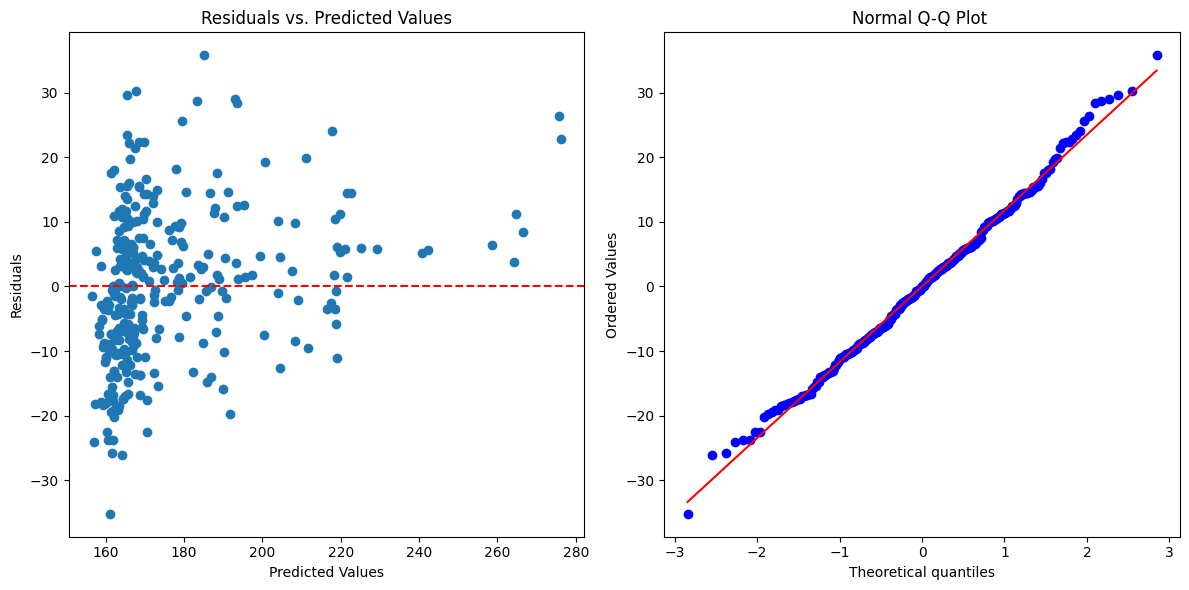

In [4727]:
#residual plots
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot



# Residuals
residuals = y_train - y_train_pred
#residuals = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

plt.subplot(1, 2, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot ')

plt.tight_layout()
plt.show()

In [4728]:
import matplotlib.pyplot as plt


# Get the coefficients and corresponding feature names
coefficients = model.coef_
feature_names = X.columns

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients)

# Add labels and title
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')
plt.title('Linear Regression Coefficients')

# Show the plot
plt.tight_layout()
plt.show()

AttributeError: Coefficients are not defined for Booster type None

In [ ]:
plt.figure(figsize=(8, 6))

y_test = y_test[y_test<1000][:20].to_numpy()
y_test_pred=y_test_pred[y_test_pred<1000][:20]

plt.scatter(range(len(y_test[y_test<1000][:20])), y_test[y_test<100][:20], color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test_pred[y_test_pred<1000][:20])), y_test_pred[y_test_pred<1000][:20], color='red', label='Predicted', alpha=0.5)

print(type(y_test_pred))
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_test_pred[i]], color='gray', linestyle='--', lw=1)

plt.title('Comparison of Actual and Predicted Streams')
plt.xlabel('Index of Samples')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)
#plt.show()

In [ ]:
coefs_df = pd.DataFrame([feature_names, coefficients]).T
coefs_df.columns=['name', 'coef']
coefs_df = coefs_df.set_index('name')
coefs_df = coefs_df.sort_values('coef')

coefs_df